In [1]:
import numpy as np
import pandas as pd
import pretty_midi
from pypianoroll import Multitrack
from utils import grid_plot, Timer
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("../datasets/theorytab/theorytab.csv")
df

,Unnamed: 0,path,artist,song,section,nokey,key_signature,estimated_key_signature,in_scale_rate,estimated_in_scale_rate,...,lowest_melody,highest_chord,lowest_chord,bpm,time_signature,beats,bars,time,has_melody_track,has_chord_track
0,0,q/quincy-jones-and-his-orchestra/soul-bossa-no...,quincy-jones-and-his-orchestra,soul-bossa-nova,chorus,False,Bb Major,Bb Major,0.88278,0.88278,...,65.0,63.0,43.0,146,4/4,48,12,19.73,True,True
1,1,q/quincy-jones-and-his-orchestra/soul-bossa-no...,quincy-jones-and-his-orchestra,soul-bossa-nova,chorus,True,Bb Major,C Major,0.74186,0.88278,...,55.0,60.0,43.0,146,4/4,48,12,19.73,True,True
2,2,q/queen-and-bowie/under-pressure/intro-and-ver...,queen-and-bowie,under-pressure,"intro,verse",False,D Major,D Major,1.00000,1.00000,...,57.0,57.0,45.0,120,4/4,32,8,16.00,True,True
3,3,q/queen-and-bowie/under-pressure/intro-and-ver...,queen-and-bowie,under-pressure,"intro,verse",True,D Major,C Major,0.74297,1.00000,...,55.0,55.0,43.0,120,4/4,32,8,16.00,True,True
4,4,q/queen-and-bowie/under-pressure/intro_nokey.mid,queen-and-bowie,under-pressure,intro,True,D Major,C Major,0.65812,1.00000,...,55.0,59.0,48.0,240,4/4,32,8,8.00,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39609,39609,m/myla-smith/cant-say-no/verse_nokey.mid,myla-smith,cant-say-no,verse,True,E Major,C Major,0.34148,0.98072,...,57.0,60.0,43.0,124,4/4,33,8,15.48,True,True
39610,39610,m/myla-smith/slow-down/verse-and-pre-chorus_ke...,myla-smith,slow-down,"verse,pre-chorus",False,D Major,D Major,1.00000,1.00000,...,57.0,57.0,43.0,128,4/4,57,14,26.25,True,True
39611,39611,m/myla-smith/slow-down/verse-and-pre-chorus_no...,myla-smith,slow-down,"verse,pre-chorus",True,D Major,C Major,0.71247,1.00000,...,55.0,60.0,43.0,128,4/4,57,14,26.25,True,True
39612,39612,m/myla-smith/slow-down/chorus_key.mid,myla-smith,slow-down,chorus,False,D Major,D Major,1.00000,1.00000,...,55.0,57.0,43.0,128,4/4,28,7,13.12,True,True


sample 0 picked from q/quincy-jones-and-his-orchestra/soul-bossa-nova/chorus_key.mid


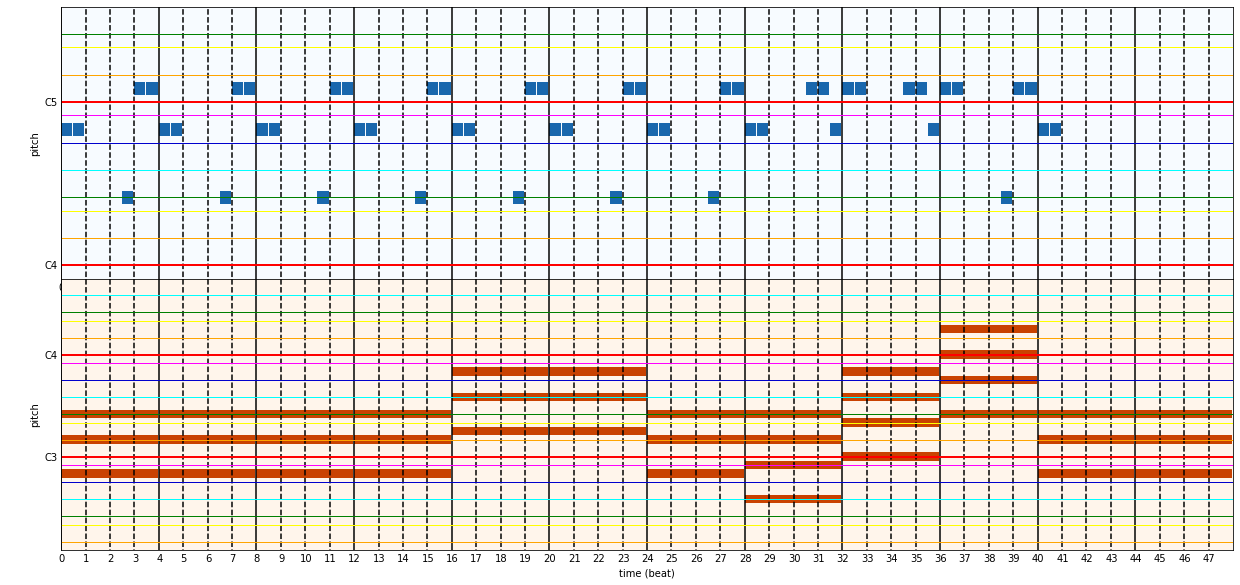

In [2]:
input_dir = "../datasets/theorytab/pianoroll"

def get_sample(index=0, get_series=False):
    path = df.loc[index]['path']
    ppr = Multitrack(f"{input_dir}/{path}")
    print(f"sample {index} picked from {path}")
    if get_series:
        return ppr, df.loc[index]
    else:
        return ppr

grid_plot(get_sample())

In [3]:
print("# of songs:", len(df['song'].unique()))

# of songs: 11039


In [4]:
hl = df[['highest_melody', 'lowest_melody']].to_numpy()
ranges = np.array([ h-l for h, l in hl if not np.isnan(h)], dtype=int)
print("max melody pitch range", max(ranges))

max melody pitch range 62


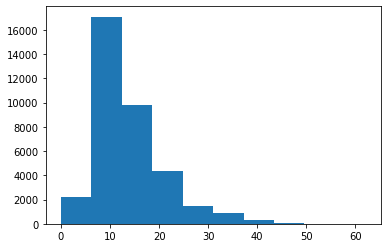

In [5]:
plt.hist(ranges)
plt.show()

In [6]:
print("pitch range is in 2 octaves:", len(ranges[ranges < 24]) / len(df))

pitch range is in 2 octaves: 0.8226384611500984


確かに2オクターブ内にメロディをシフトしてもあまり問題はないのかもしれない

highests: [ 32.  35.  36.  37.  39.  41.  43.  44.  45.  46.  47.  48.  49.  50.
  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.
  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.
  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.
  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105.  nan]


/root/midi/.venv/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/root/midi/.venv/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


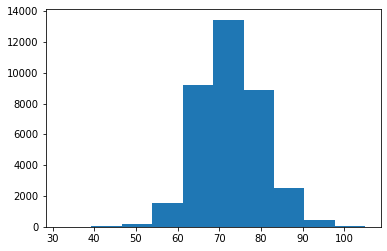

In [7]:
print("highests:", np.sort(df['highest_melody'].unique()))
plt.hist(df["highest_melody"])
plt.show()

lowests: [14. 19. 20. 22. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37.
 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55.
 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73.
 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 93. 96. nan]


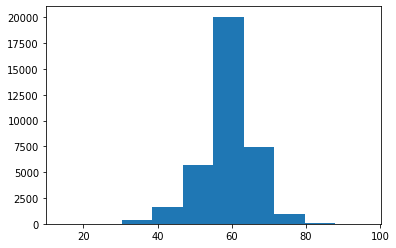

In [8]:
print("lowests:", np.sort(df['lowest_melody'].unique()))
plt.hist(df["lowest_melody"])
plt.show()

In [9]:
bottom = pretty_midi.note_name_to_number("C4")
top = pretty_midi.note_name_to_number("B5")

print(bottom, top)

60 83


In [10]:
print("highests lower than bottom:", len(df[bottom > df['highest_melody']]))
print("highests higher than top:", len(df[top < df['highest_melody']]))
print("lowests lower than bottom:", len(df[bottom > df['lowest_melody']]))
print("lowests higher than top:", len(df[top < df['lowest_melody']]))

highests lower than bottom: 1045
highests higher than top: 2987
lowests lower than bottom: 19070
lowests higher than top: 8


C4は削り過ぎじゃない？

In [11]:
bottom = pretty_midi.note_name_to_number("C3")
top = pretty_midi.note_name_to_number("B5")

print(bottom, top)

48 83


In [12]:
print("highests lower than bottom:", len(df[bottom > df['highest_melody']]))
print("highests higher than top:", len(df[top < df['highest_melody']]))
print("lowests lower than bottom:", len(df[bottom > df['lowest_melody']]))
print("lowests higher than top:", len(df[top < df['lowest_melody']]))

highests lower than bottom: 31
highests higher than top: 2987
lowests lower than bottom: 2249
lowests higher than top: 8


C3くらいならよくない？

In [13]:
print("time signature is 4/4:", len(df[df['time_signature'] == "4/4"]) / len(df))

time signature is 4/4: 0.9142222446609785


4/4のみの曲に限定しても大して影響はない

[49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66.
 67. 68. 69. 70. 71. 91. 93. nan]
[36. 38. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. nan]


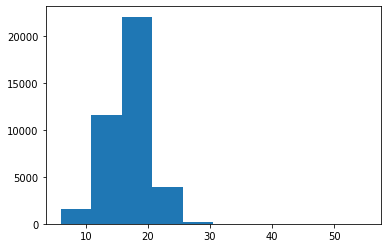

In [14]:
hl = df[['highest_chord', 'lowest_chord']]
print(np.sort(df['highest_chord'].unique()))
print(np.sort(df['lowest_chord'].unique()))
hl = hl.to_numpy()
ranges = np.array([ h-l for h, l in hl if not np.isnan(h)], dtype=int)
plt.hist(ranges)
plt.show()

In [15]:
df[df['highest_chord'] > 90]

,Unnamed: 0,path,artist,song,section,nokey,key_signature,estimated_key_signature,in_scale_rate,estimated_in_scale_rate,...,lowest_melody,highest_chord,lowest_chord,bpm,time_signature,beats,bars,time,has_melody_track,has_chord_track
9278,9278,a/arvo-part/silentium/intro-and-verse_key.mid,arvo-part,silentium,"intro,verse",False,D Major,A minor,0.68238,0.96648,...,NaN,93.0,38.0,240,6/4,78,13,19.5,False,True
9279,9279,a/arvo-part/silentium/intro-and-verse_nokey.mid,arvo-part,silentium,"intro,verse",True,D Major,G minor,0.42854,0.96648,...,NaN,91.0,36.0,240,6/4,78,13,19.5,False,True


コード判定の範囲は36～72の3オクターブで問題ない

曲の[セクション](https://dawlesson.net/technique/20170120/)について  

In [16]:
df_midinet = df[df["nokey"]][df["time_signature"] == "4/4"][df["has_melody_track"]][df["has_chord_track"]]
part_names = []
part_nums = []
for part in df_midinet["section"].unique():
    part_names.append(part)
    part_nums.append(df_midinet[df_midinet["section"] == part].shape[0])
part_nums, part_names = np.array(part_nums), np.array(part_names)
idx = np.argsort(part_nums)[::-1]
for name, num in zip(part_names[idx], part_nums[idx]):
    print(f"{name}: {num}")

chorus: 5646
verse: 3848
intro: 2041
pre-chorus: 1008
bridge: 735
intro,verse: 732
instrumental: 576
verse,pre-chorus: 519
pre-chorus,chorus: 358
outro: 288
chorus-lead-out: 241
solo: 199
solo-1: 57
pre-outro: 45
solo-2: 39
solo-3: 12
outro-1: 10
outro-2: 7
loop: 3
variation-18: 1
variation-1: 1
lead-in-alt: 1
theme: 1
lead-in: 1
verse-2: 1
verse-1: 1
chorus-2: 1
intro,chorus: 1
intro-2: 1
development-2: 1
theme-3-recap: 1
theme-2: 1
development-1: 1
theme-3: 1
theme-2-recap: 1
theme-1: 1
intro-1: 1
secondary-development: 1
variation-17: 1
nan: 0


/root/midi/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


次の6つに分ける  
複数持ちは以下のリストで上にあるものを優先  
全体に占める割合も多くないのでちょっとぼやけても問題ないはず？
- intro, lead-in
- verse
- bridge(pre-chorus)
- chorus(loop, theme, variation, development)
- instrumental(solo)
- outro

In [17]:
section_list = [
    ['intro', 'lead-in'],
    ['verse'],
    ['bridge', 'pre-chorus'],
    ['chorus', 'loop', 'theme', 'variation', 'development'],
    ['instrumental', 'solo'],
    ['outro']
]

section_counts = np.zeros(6, dtype=int)
nans = 0
for section in df_midinet["section"]:
    if section is np.nan:
        nans += 1
        continue
    for s, section_names in enumerate(section_list):
        decided = False
        for section_name in section_names:
            if section_name in section:
                section_counts[s] += 1
                decided = True
                break
        if decided: break
                
for i, c in enumerate(section_counts):
    print(f"{section_list[i][0]}: {c}")
print(f"{nans} nans")

intro: 2778
verse: 4369
bridge: 2101
chorus: 5903
instrumental: 883
outro: 350
2 nans


In [18]:
print(sum(section_counts), df_midinet.shape[0])

16384 16386


あとは6次元ベクトルにしてGANの条件付けにでもつかえるか

### メロディがコード音に沿っている割合

In [25]:
df_org = pd.read_csv("../datasets/theorytab/theorytab.csv")
df = df_org
df = df[(df["nokey"] == False) & (df["time_signature"] == "4/4")]
df = df[df["has_melody_track"] & df["has_chord_track"]]
df = df.reset_index()
print(df.shape)
df.head()

(16386, 23)


,index,Unnamed: 0,path,artist,song,section,nokey,key_signature,estimated_key_signature,in_scale_rate,...,lowest_melody,highest_chord,lowest_chord,bpm,time_signature,beats,bars,time,has_melody_track,has_chord_track
0,0,0,q/quincy-jones-and-his-orchestra/soul-bossa-no...,quincy-jones-and-his-orchestra,soul-bossa-nova,chorus,False,Bb Major,Bb Major,0.88278,...,65.0,63.0,43.0,146,4/4,48,12,19.73,True,True
1,2,2,q/queen-and-bowie/under-pressure/intro-and-ver...,queen-and-bowie,under-pressure,"intro,verse",False,D Major,D Major,1.00000,...,57.0,57.0,45.0,120,4/4,32,8,16.00,True,True
2,5,5,q/queen-and-bowie/under-pressure/intro_key.mid,queen-and-bowie,under-pressure,intro,False,D Major,D Major,1.00000,...,57.0,61.0,50.0,240,4/4,32,8,8.00,True,True
3,8,8,q/queen/the-show-must-go-on/intro-and-verse_ke...,queen,the-show-must-go-on,"intro,verse",False,B Major,B minor,0.64627,...,70.0,59.0,42.0,83,4/4,57,14,40.48,True,True
4,10,10,q/queen/the-show-must-go-on/bridge_key.mid,queen,the-show-must-go-on,bridge,False,C Major,A minor,1.00000,...,57.0,60.0,43.0,84,4/4,24,6,17.14,True,True


0.7050272963033801


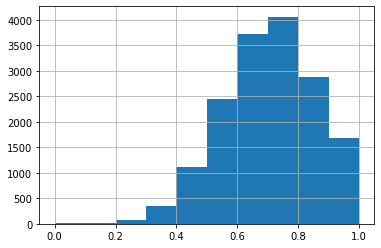

In [26]:
print(df['on_chord_rate'].mean())
df['on_chord_rate'].hist()

コードがメロディに沿っている割合はほぼ1というわけではない  
しかし，生成データにはそれくらい沿っていてほしい

### テンポはどんなもん？

mean: 124.07128036128402, med: 127.0


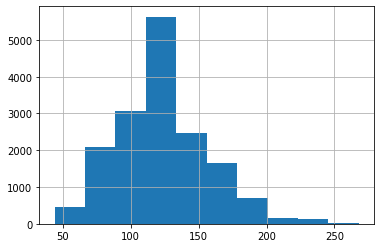

In [30]:
print(f"mean: {df['bpm'].mean()}, med: {df['bpm'].median()}")
df['bpm'].hist()

In [55]:
print(len(df[df['bpm'] < 95])) # slow
print(len(df[(95 <= df['bpm']) & (df['bpm'] < 120)])) # middle
print(len(df[(120 <= df['bpm']) & (df['bpm'] < 130)])) # normal
print(len(df[(130 <= df['bpm']) & (df['bpm'] < 150)])) # uptempo
print(len(df[150 <= df['bpm']])) # fast

3351
3309
3950
2463
3313


sample 128 picked from c/cults/go-outside/intro_key.mid


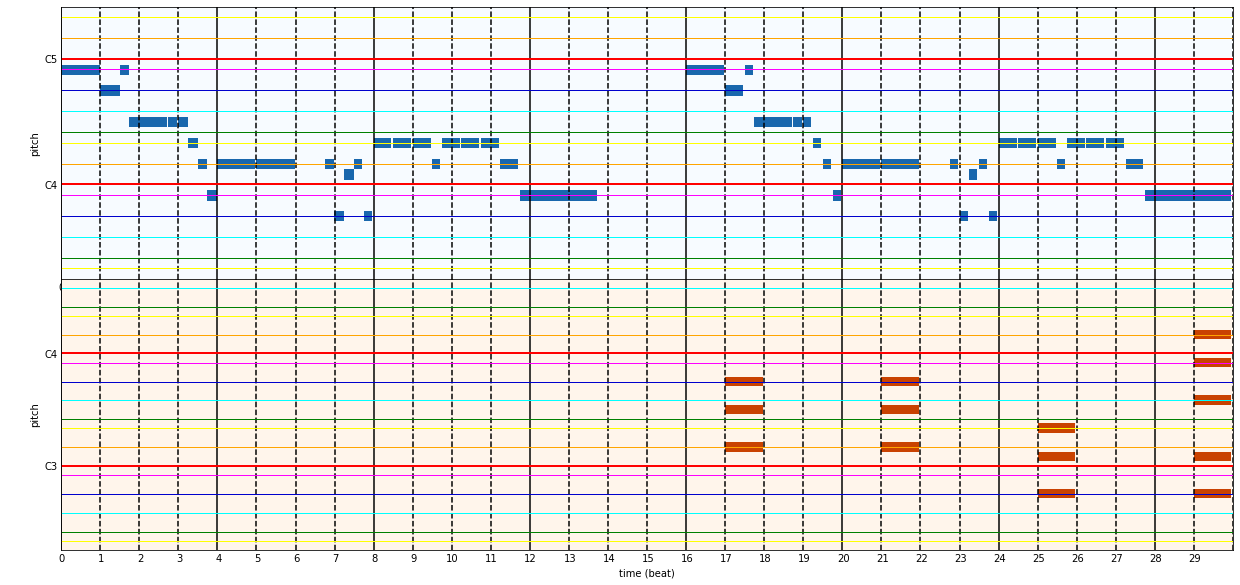

In [29]:
grid_plot(get_sample(128))

## 小節数

In [63]:
df_org = pd.read_csv("../datasets/theorytab/theorytab.csv")
df = df_org
df = df[(df["nokey"] == False) & (df["time_signature"] == "4/4")]
df = df[df["has_melody_track"] & df["has_chord_track"]]
df = df.reset_index()
print(df.shape)
print(len(df['song'].unique()), 'songs')

(16386, 23)
9380 songs


mean: 11.090259978030026, med: 8.0
max: 136, min: 1


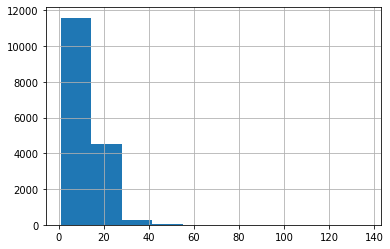

In [70]:
print(f"mean: {df['bars'].mean()}, med: {df['bars'].median()}")
print(f"max: {df['bars'].max()}, min: {df['bars'].min()}")
df['bars'].hist()
None

なんか異様に小節数多いやつがいる

In [65]:
print("All files       :", len(df))
print("Too short files :", len(df[df['bars'] < 4]))
print("Too long files  :", len(df[df['bars'] > 16]))

All files       : 16386
Too short files : 104
Too long files  : 1722


これら2000ファイルほどは取り除いても構わないだろう

14560 files
8683 songs
mean: 9.790934065934065, med: 8.0


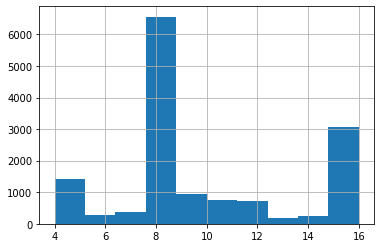

In [69]:
df_normal = df[(df['bars'] >= 4) & (df['bars'] <= 16)]
print(len(df_normal), "files")
print(len(df_normal['song'].unique()), 'songs')
print(f"mean: {df_normal['bars'].mean()}, med: {df_normal['bars'].median()}")
df_normal['bars'].hist()
None

In [72]:
len(df_normal[df_normal['bars'] > 8])

5945

データのほとんどが8小節か16小節になっていることが分かる

## バークリーメソッドにおける不協和度レベル
[近代科学者 音楽・数学・言語](https://www.kindaikagaku.co.jp/information/kd0538.htm)より引用  

|不協和度レベル|程度|音程(+)|Cに対する音名|
|:---:|---|---|---|
|0|共和音程|4, 3, 9, 8|E, Eb(D#), A, Ab(G#)|
|1|無彩色または安定|0, 12, 7|C, C^, G|
|2|無機的|5|F|
|3|穏やかな不協和|2, 10|D, Bb(A#)|
|4|鋭い不協和|1, 11|Db(C#), B|
|5|不安定|6|Gb(F#)|

これらがどれだけ使われているかを評価指標に使いたい．  
メロディの音に対するコードの各構成音の不協和度レベルを取得する  
協和度レベルに数字はついているが，大小関係ではないため，全ての協和度レベルの平均をとっても意味はない．  
そのため，6つのクラスそれぞれに，幾つのステップが入るかを数え，それぞれの曲中での割合を求めることにする．  

In [3]:
df_org = pd.read_csv("../datasets/theorytab/theorytab.csv")
df = df_org
df = df[(df["nokey"] == False) & (df["time_signature"] == "4/4")]
df = df[df["has_melody_track"] & df["has_chord_track"]]
df = df.reset_index()

In [107]:
def barklee_dissonance_levels_old(ppr, normalize=True):
    melody = ppr.tracks[0].pianoroll
    chord = ppr.tracks[1].pianoroll
    
    with Timer():
        chord_steps, chord_pcs = np.where(chord)
        chord_pcs_lists = [[] for step in range(len(chord))]
        for i, chord_pc in enumerate(chord_pcs):
            chord_pcs_lists[chord_steps[i]].append(chord_pc)
    
    dissonance_levels = [1, 4, 3, 0, 0, 2, 5, 1, 0, 0, 3, 4]
    dissonance_level_counts = np.zeros(6, dtype=float)
    
    with Timer():
        for step, melody_pc in zip(*np.where(melody)):
            for chord_pc in chord_pcs_lists[step]:
                dist = (chord_pc - melody_pc) % 12
                dissonance_level = dissonance_levels[dist]
                dissonance_level_counts[dissonance_level] += 1.0
    
    if normalize:
        dissonance_level_sum = sum(dissonance_level_counts)
        dissonance_level_rates = dissonance_level_counts / dissonance_level_sum
        return dissonance_level_rates
    
    return dissonance_level_counts

In [156]:
def barklee_dissonance_levels(ppr, normalize=True):
    melody = ppr.tracks[0].pianoroll
    chord = ppr.tracks[1].pianoroll
    
    chord_steps, chord_pcs = np.where(chord)
    chord_pcs_lists = [[] for step in range(len(chord))]
    for i, chord_pc in enumerate(chord_pcs):
        chord_pcs_lists[chord_steps[i]].append(chord_pc)
    
    dissonance_levels = [1, 4, 3, 0, 0, 2, 5, 1, 0, 0, 3, 4]
    dissonance_level_counts = np.zeros(6, dtype=float)
    
    for step, melody_pc in zip(*np.where(melody)):
        for chord_pc in chord_pcs_lists[step]:
            dist = (chord_pc - melody_pc) % 12
            dissonance_level = dissonance_levels[dist]
            dissonance_level_counts[dissonance_level] += 1.0
    
    if normalize:
        dissonance_level_sum = sum(dissonance_level_counts)
        if dissonance_level_sum > 0:
            dissonance_level_rates = dissonance_level_counts / dissonance_level_sum
        else:
            dissonance_level_rates = dissonance_level_counts
        return dissonance_level_rates
    
    return dissonance_level_counts

sample 3 picked from q/queen/the-show-must-go-on/intro-and-verse_key.mid


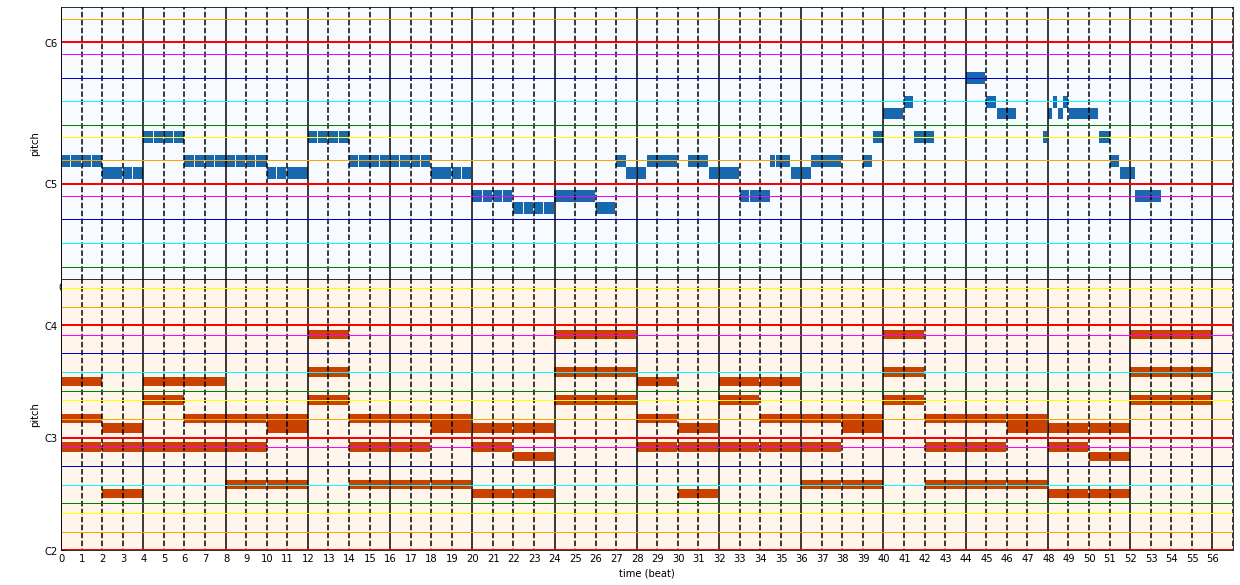

In [154]:
ppr = get_sample(3)
grid_plot(ppr)

In [161]:
print(barklee_dissonance_levels(ppr))

[0.29454545 0.33272727 0.14818182 0.10151515 0.07393939 0.04909091]


In [ ]:
input_dir = "../datasets/theorytab/pianoroll"

dissonance_levels_list = []
for path in df['path']:
    ppr = Multitrack(f"{input_dir}/{path}")
    levels = barklee_dissonance_levels(ppr)
    dissonance_levels_list.append(levels)

dissonance_levels_list = np.array(dissonance_levels_list)
print(dissonance_levels_list.shape)

In [187]:
np.save('./data/dissonance_levels_list.npy', dissonance_levels_list)

In [205]:
dissonance_levels_list = np.load('./data/dissonance_levels_list.npy')

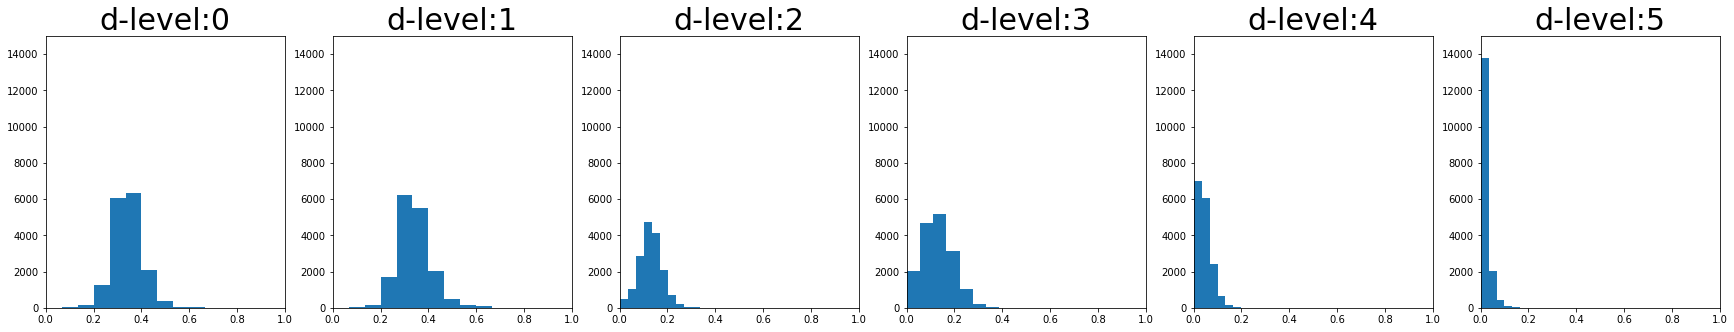

In [206]:
fig, axs = plt.subplots(1, 6, figsize=(30, 5))
for i in range(6):
    axs[i].hist(dissonance_levels_list[:, i])
    axs[i].set_title(f'd-level:{i}', fontsize=30)
    axs[i].set_xlim(0., 1.)
    axs[i].set_ylim(0, 15000)

不協和音になるほど曲の中での使用数が少なくなっていることがわかる  
6段階に別れているが，大別すると[0,1], [2,3], [4,5]になるようである

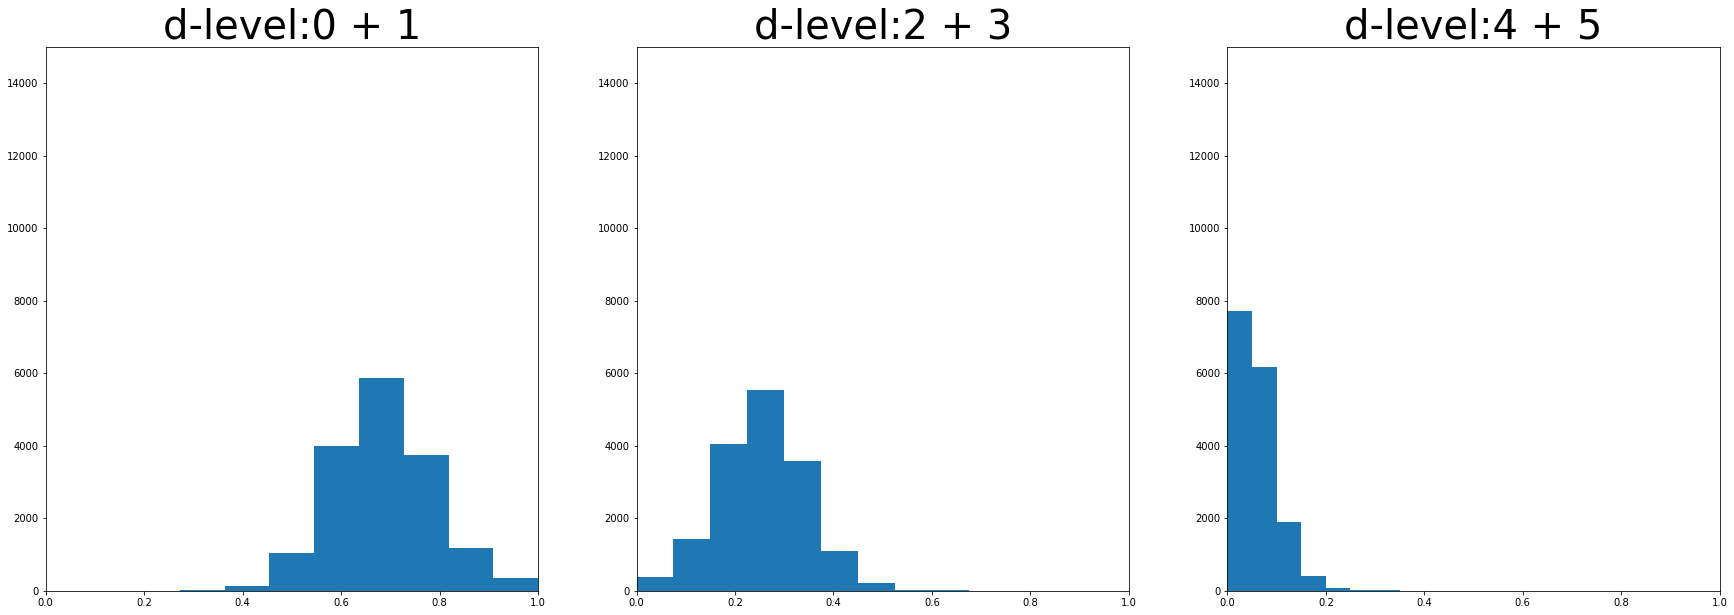

In [207]:
dissonance_levels_list_in_3 = np.zeros([len(dissonance_levels_list), 3])
dissonance_levels_list_in_3[:, 0] = dissonance_levels_list[:, 0] + dissonance_levels_list[:, 1]
dissonance_levels_list_in_3[:, 1] = dissonance_levels_list[:, 2] + dissonance_levels_list[:, 3]
dissonance_levels_list_in_3[:, 2] = dissonance_levels_list[:, 4] + dissonance_levels_list[:, 5]

fig, axs = plt.subplots(1, 3, figsize=(30, 10))
for i in range(3):
    axs[i].hist(dissonance_levels_list_in_3[:, i])
    axs[i].set_title(f'd-level:{i*2} + {i*2+1}', fontsize=40)
    axs[i].set_xlim(0., 1.)
    axs[i].set_ylim(0, 15000)

わかりやすく分布した．  
生成される楽曲の協和度もこのように分布してほしいものである．

## 音符の密度
曲中にどれくらいメロディが鳴っているところがあるのかの分布が欲しい

In [6]:
def on_note_rate(ppr):
    melody = ppr.tracks[0].pianoroll
    melody_steps = np.any(melody, axis=1)
    return melody_steps.sum() / melody.shape[0]

sample 3 picked from q/queen-and-bowie/under-pressure/intro-and-verse_nokey.mid


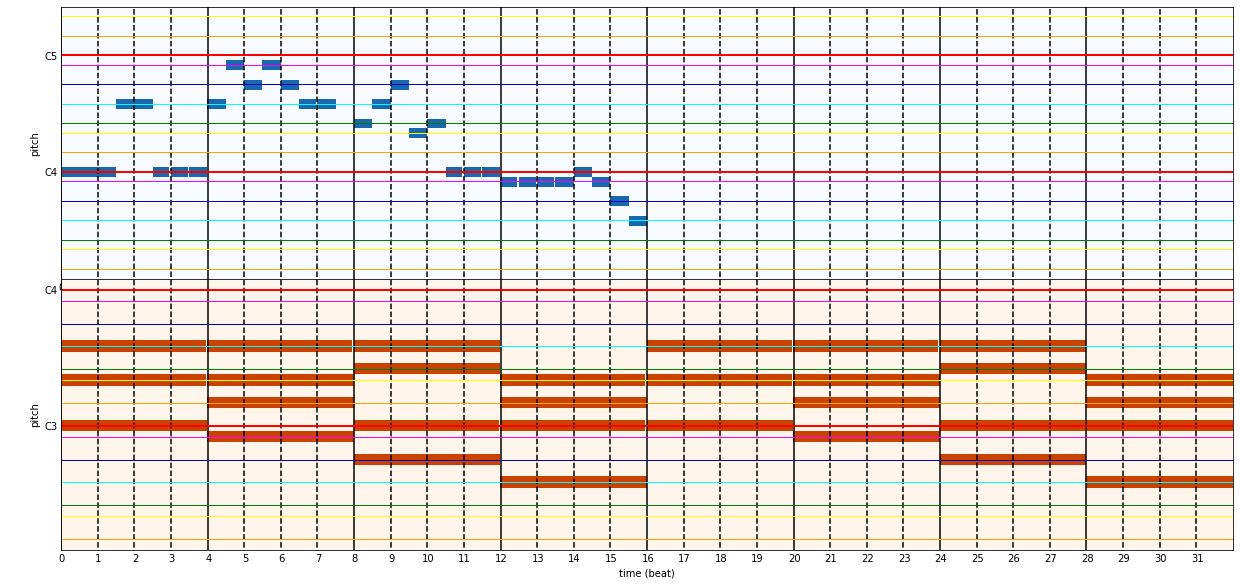

In [4]:
ppr = get_sample(3)
grid_plot(ppr)

In [7]:
on_note_rate(ppr)

0.4739583333333333

In [8]:
df_org = pd.read_csv("../datasets/theorytab/theorytab.csv")
df = df_org
df = df[(df["nokey"] == False) & (df["time_signature"] == "4/4")]
df = df[df["has_melody_track"] & df["has_chord_track"]]
df = df.reset_index()

In [9]:
input_dir = "../datasets/theorytab/pianoroll"

on_note_rate_list = []
for path in df['path']:
    ppr = Multitrack(f"{input_dir}/{path}")
    rate = on_note_rate(ppr)
    on_note_rate_list.append(rate)

on_note_rate_list = np.array(on_note_rate_list)
print(on_note_rate_list.shape)

(16386,)


In [10]:
np.save('./data/on_note_rate_list.npy', on_note_rate_list)

In [11]:
on_note_rate_list = np.load('./data/on_note_rate_list.npy')

mean: 0.8081 | median: 0.8386 | std: 0.1535


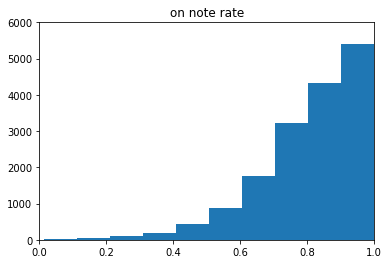

In [18]:
print(f'mean: {on_note_rate_list.mean():.4f} | median: {np.median(on_note_rate_list):.4f} | std: {np.std(on_note_rate_list):.4f}')
plt.hist(on_note_rate_list)
plt.title(f'on note rate')
plt.xlim(0., 1.)
plt.ylim(0, 6000)
plt.show()

結構密度はあるみたい  
この分布のデータならうまく学習できればスッカスカにはならなさそう